# Лабораторная работа 1. Введение в машинное обучение. Обучение с учителем. Задача регрессии

<b>Традиционное предупреждение для всех лабораторных работ:</b> перед обучением моделей необходимо выполнить предварительную обработку данных, которая <b>обязательно</b> включает в себя:
- заполнение пропущенных значений (рекомедуется логика заполнения пропусков на основе типа данных, которая использовалась в РГР по Практикуму);
- преобразование категориальных признаков в числовые (используйте one-hot кодирование или map; используйте знания с Практикума).

Предобработка может включать в себя другие действия, но выполнение описанных выше действий обязательно.

Сделайте это один раз и сохраните в отдельный csv файл, а потом его используйте.

<b>Выполните следующие задания:</b>
- загрузите датасет для регрессии, выделите целевой признак и предикторы, разбейте данные на обучающую и тестовую выборку;
- решите задачу регрессии на ваших данных с использованием моделей sklearn (линейная регрессия + L1, L2), для моделей с регуляризациями подберите гиперпараметр;
- решите задачу регрессии на ваших данных с использованием моделей sklearn (полиномиальная регрессия + L1, L2), для моделей с регуляризациями подберите гиперпараметр;
- вычислите значения метрик $R^2$, MAE, MSE, RMSE, MAPE для всех обученных моделей; выберите лучшую модель;
- самостоятельно реализуйте (желательно в виде класса) модель линейной регрессии с регуляризацией (можете выбрать L1 или L2);
- самостоятельно реализуйте вычисление всех используемых метрик (в виде функций, принимающих два аргумента);
- обучите вашу модель линейной регрессии на ваших данных; оцените качество с помощью реализованных вами метрик.

# Предобработка данных

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../data/cars.csv')
data

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,automatic,silver,290000,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,301
38527,Chrysler,PT Cruiser,mechanical,blue,321000,2004,diesel,False,diesel,2.2,...,True,False,False,True,True,False,False,True,True,317
38528,Chrysler,300,automatic,blue,777957,2000,gasoline,False,gasoline,3.5,...,True,False,False,True,True,False,False,True,True,369
38529,Chrysler,PT Cruiser,mechanical,black,20000,2001,gasoline,False,gasoline,2.0,...,True,False,False,False,False,False,False,False,True,490


In [26]:
data.isnull().any().loc[data.isnull().any() == True]

engine_capacity    True
dtype: bool

In [3]:
data['engine_capacity'].fillna(data['engine_capacity'].mean(), inplace=True)

In [5]:
data.isnull().any()

manufacturer_name    False
model_name           False
transmission         False
color                False
odometer_value       False
year_produced        False
engine_fuel          False
engine_has_gas       False
engine_type          False
engine_capacity      False
body_type            False
has_warranty         False
state                False
drivetrain           False
price_usd            False
is_exchangeable      False
location_region      False
number_of_photos     False
up_counter           False
feature_0            False
feature_1            False
feature_2            False
feature_3            False
feature_4            False
feature_5            False
feature_6            False
feature_7            False
feature_8            False
feature_9            False
duration_listed      False
dtype: bool

In [4]:
data.drop_duplicates(inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38491 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38491 non-null  object 
 1   model_name         38491 non-null  object 
 2   transmission       38491 non-null  object 
 3   color              38491 non-null  object 
 4   odometer_value     38491 non-null  int64  
 5   year_produced      38491 non-null  int64  
 6   engine_fuel        38491 non-null  object 
 7   engine_has_gas     38491 non-null  bool   
 8   engine_type        38491 non-null  object 
 9   engine_capacity    38491 non-null  float64
 10  body_type          38491 non-null  object 
 11  has_warranty       38491 non-null  bool   
 12  state              38491 non-null  object 
 13  drivetrain         38491 non-null  object 
 14  price_usd          38491 non-null  float64
 15  is_exchangeable    38491 non-null  bool   
 16  location_region    384

In [10]:
dum_data = pd.get_dummies(data, columns=['transmission', 'engine_type', 'has_warranty', 'is_exchangeable', 'engine_has_gas', 'body_type', 'state', 'engine_fuel', 'drivetrain', 'location_region', 'feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9'], drop_first=True)
dum_data

,manufacturer_name,model_name,color,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed,...,feature_0_True,feature_1_True,feature_2_True,feature_3_True,feature_4_True,feature_5_True,feature_6_True,feature_7_True,feature_8_True,feature_9_True
0,Subaru,Outback,silver,190000,2010,2.5,10900.00,9,13,16,...,False,True,True,True,False,True,False,True,True,True
1,Subaru,Outback,blue,290000,2002,3.0,5000.00,12,54,83,...,False,True,False,False,True,True,False,False,False,True
2,Subaru,Forester,red,402000,2001,2.5,2800.00,4,72,151,...,False,True,False,False,False,False,False,False,True,True
3,Subaru,Impreza,blue,10000,1999,3.0,9999.00,9,42,86,...,True,False,False,False,False,False,False,False,False,False
4,Subaru,Legacy,black,280000,2001,2.5,2134.11,14,7,7,...,False,True,False,True,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,300,silver,290000,2000,3.5,2750.00,5,85,301,...,False,True,False,False,True,True,False,False,True,True
38527,Chrysler,PT Cruiser,blue,321000,2004,2.2,4800.00,4,20,317,...,False,True,False,False,True,True,False,False,True,True
38528,Chrysler,300,blue,777957,2000,3.5,4300.00,3,63,369,...,False,True,False,False,True,True,False,False,True,True
38529,Chrysler,PT Cruiser,black,20000,2001,2.0,4000.00,7,156,490,...,False,True,False,False,False,False,False,False,False,True


In [11]:
dum_data.drop(['manufacturer_name', 'model_name', 'number_of_photos', 'color', 'up_counter'], axis=1, inplace=True)

In [9]:
import matplotlib.pyplot as plt
import numpy as np

In [6]:
data['odometer_value'].values

array([190000, 290000, 402000, ..., 777957,  20000, 297729], dtype=int64)

In [16]:
dd = pd.read_csv('../data/dum_data.csv')
dd

,Unnamed: 0,odometer_value,year_produced,engine_capacity,price_usd,duration_listed,transmission_mechanical,engine_type_electric,engine_type_gasoline,has_warranty_True,...,feature_0_True,feature_1_True,feature_2_True,feature_3_True,feature_4_True,feature_5_True,feature_6_True,feature_7_True,feature_8_True,feature_9_True
0,0,190000,2010,2.5,10900.00,16,False,False,True,False,...,False,True,True,True,False,True,False,True,True,True
1,1,290000,2002,3.0,5000.00,83,False,False,True,False,...,False,True,False,False,True,True,False,False,False,True
2,2,402000,2001,2.5,2800.00,151,False,False,True,False,...,False,True,False,False,False,False,False,False,True,True
3,3,10000,1999,3.0,9999.00,86,True,False,True,False,...,True,False,False,False,False,False,False,False,False,False
4,4,280000,2001,2.5,2134.11,7,False,False,True,False,...,False,True,False,True,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38486,38526,290000,2000,3.5,2750.00,301,False,False,True,False,...,False,True,False,False,True,True,False,False,True,True
38487,38527,321000,2004,2.2,4800.00,317,True,False,False,False,...,False,True,False,False,True,True,False,False,True,True
38488,38528,777957,2000,3.5,4300.00,369,False,False,True,False,...,False,True,False,False,True,True,False,False,True,True
38489,38529,20000,2001,2.0,4000.00,490,True,False,True,False,...,False,True,False,False,False,False,False,False,False,True


In [19]:
dd.drop(['Unnamed: 0'], axis=1)

,odometer_value,year_produced,engine_capacity,price_usd,duration_listed,transmission_mechanical,engine_type_electric,engine_type_gasoline,has_warranty_True,is_exchangeable_True,...,feature_0_True,feature_1_True,feature_2_True,feature_3_True,feature_4_True,feature_5_True,feature_6_True,feature_7_True,feature_8_True,feature_9_True
0,190000,2010,2.5,10900.00,16,False,False,True,False,False,...,False,True,True,True,False,True,False,True,True,True
1,290000,2002,3.0,5000.00,83,False,False,True,False,True,...,False,True,False,False,True,True,False,False,False,True
2,402000,2001,2.5,2800.00,151,False,False,True,False,True,...,False,True,False,False,False,False,False,False,True,True
3,10000,1999,3.0,9999.00,86,True,False,True,False,True,...,True,False,False,False,False,False,False,False,False,False
4,280000,2001,2.5,2134.11,7,False,False,True,False,True,...,False,True,False,True,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38486,290000,2000,3.5,2750.00,301,False,False,True,False,True,...,False,True,False,False,True,True,False,False,True,True
38487,321000,2004,2.2,4800.00,317,True,False,False,False,True,...,False,True,False,False,True,True,False,False,True,True
38488,777957,2000,3.5,4300.00,369,False,False,True,False,False,...,False,True,False,False,True,True,False,False,True,True
38489,20000,2001,2.0,4000.00,490,True,False,True,False,True,...,False,True,False,False,False,False,False,False,False,True


<Axes: >

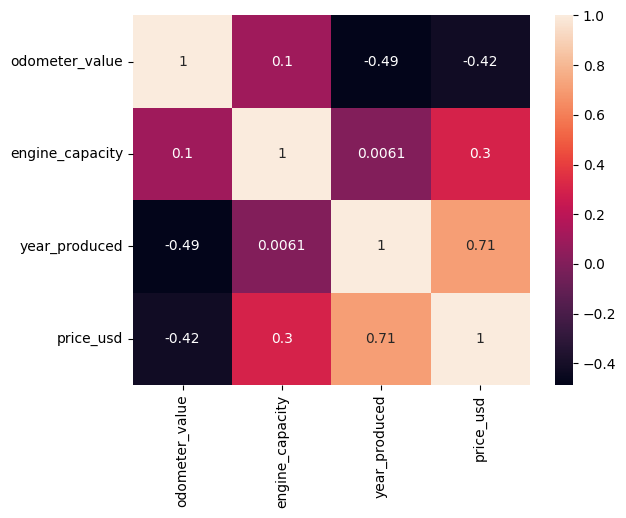

In [27]:
sns.heatmap(dd.loc[:,['odometer_value', 'engine_capacity', 'year_produced', 'price_usd']].corr(), annot=True)

In [18]:
data['engine_type'].value_counts().values

array([25611, 12870,    10], dtype=int64)

In [7]:
import seaborn as sns

<Axes: xlabel='odometer_value'>

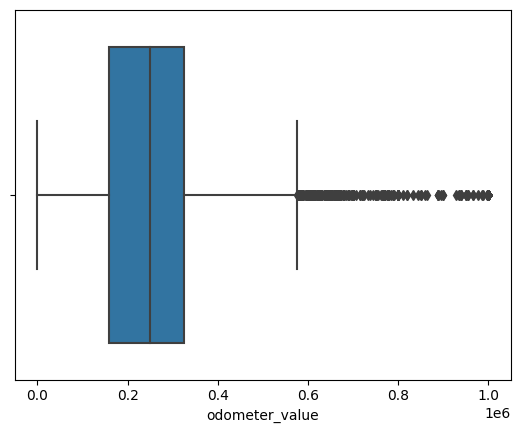

In [9]:
sns.boxplot(data=data, x="odometer_value")

([<matplotlib.patches.Wedge at 0x2b06e749660>,
 [Text(-1.093358871769859, 0.12069124873884289, 'False'),
  Text(1.0933588703573676, -0.12069126153479906, 'True')])

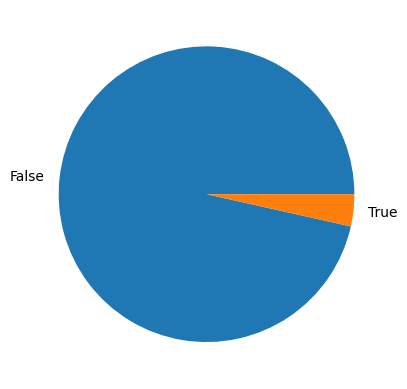

In [24]:
plt.pie(data['engine_has_gas'].value_counts().values, labels=data['engine_has_gas'].value_counts().index)

In [53]:
df = dum_data.astype(np.float64)

In [54]:
df.columns

Index(['odometer_value', 'year_produced', 'engine_capacity', 'price_usd',
       'duration_listed', 'transmission_mechanical', 'engine_type_electric',
       'engine_type_gasoline', 'has_warranty_True', 'is_exchangeable_True',
       'engine_has_gas_True', 'body_type_coupe', 'body_type_hatchback',
       'body_type_liftback', 'body_type_limousine', 'body_type_minibus',
       'body_type_minivan', 'body_type_pickup', 'body_type_sedan',
       'body_type_suv', 'body_type_universal', 'body_type_van', 'state_new',
       'state_owned', 'engine_fuel_electric', 'engine_fuel_gas',
       'engine_fuel_gasoline', 'engine_fuel_hybrid-diesel',
       'engine_fuel_hybrid-petrol', 'drivetrain_front', 'drivetrain_rear',
       'location_region_Витебская обл.', 'location_region_Гомельская обл.',
       'location_region_Гродненская обл.', 'location_region_Минская обл.',
       'location_region_Могилевская обл.', 'feature_0_True', 'feature_1_True',
       'feature_2_True', 'feature_3_True', 'feature_4_

In [57]:
df['odometer_value'].sort_values().values

array([      0.,       0.,       0., ..., 1000000., 1000000., 1000000.])

In [62]:
plt.bar(df['odometer_value'].sort_values().values, df['odometer_value'].sort_values().index)

KeyboardInterrupt: 

In [39]:
yp = df["year_produced"].value_counts().sort_index()

In [40]:
yp.index

Index([1942.0, 1950.0, 1956.0, 1959.0, 1960.0, 1961.0, 1962.0, 1963.0, 1964.0,
       1965.0, 1966.0, 1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0,
       1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0,
       1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0,
       1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0,
       2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0,
       2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0,
       2019.0],
      dtype='float64', name='year_produced')

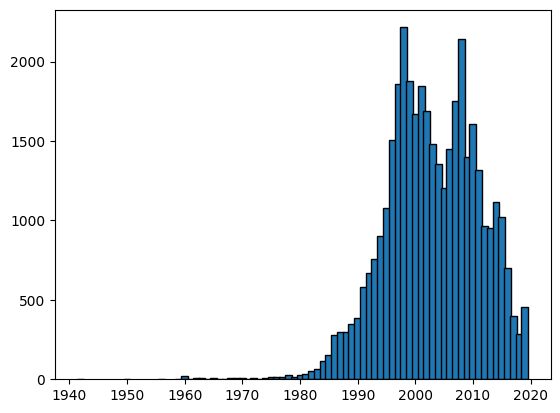

In [48]:
plt.bar(yp.index, yp.values, width=1.2, edgecolor='black')
plt.show()

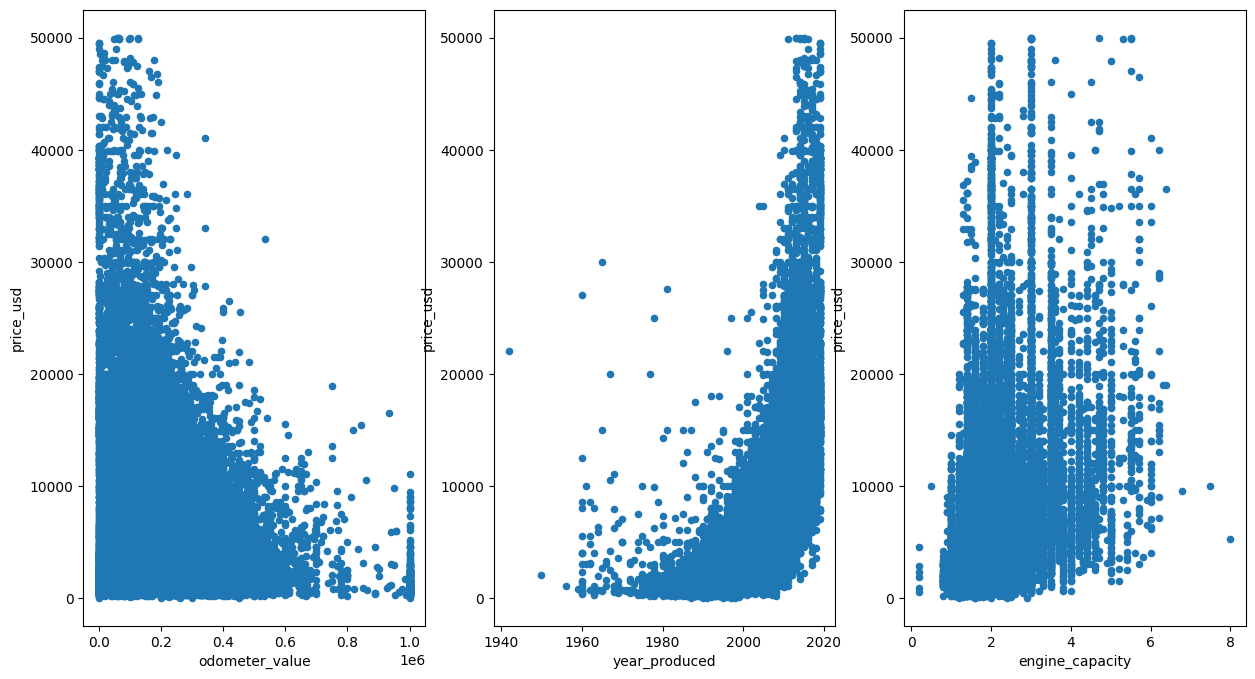

In [23]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 8))
for idx, feature in enumerate(df.columns[:3]):
    df.plot(feature, "price_usd", subplots=True, kind="scatter", ax=axes[idx%3])

In [7]:
dum_data.to_csv('../data/dum_data.csv')

# Разбиение данных на тренировочную и тестовую выборки

In [8]:
y = dum_data['price_usd']
X = dum_data.drop(['price_usd'], axis=1)

In [9]:
y

0        10900.00
1         5000.00
2         2800.00
3         9999.00
4         2134.11
           ...   
38526     2750.00
38527     4800.00
38528     4300.00
38529     4000.00
38530     3200.00
Name: price_usd, Length: 38491, dtype: float64

In [10]:
X

,odometer_value,year_produced,engine_capacity,duration_listed,transmission_mechanical,engine_type_electric,engine_type_gasoline,has_warranty_True,is_exchangeable_True,engine_has_gas_True,...,feature_0_True,feature_1_True,feature_2_True,feature_3_True,feature_4_True,feature_5_True,feature_6_True,feature_7_True,feature_8_True,feature_9_True
0,190000,2010,2.5,16,False,False,True,False,False,False,...,False,True,True,True,False,True,False,True,True,True
1,290000,2002,3.0,83,False,False,True,False,True,False,...,False,True,False,False,True,True,False,False,False,True
2,402000,2001,2.5,151,False,False,True,False,True,False,...,False,True,False,False,False,False,False,False,True,True
3,10000,1999,3.0,86,True,False,True,False,True,False,...,True,False,False,False,False,False,False,False,False,False
4,280000,2001,2.5,7,False,False,True,False,True,False,...,False,True,False,True,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,290000,2000,3.5,301,False,False,True,False,True,False,...,False,True,False,False,True,True,False,False,True,True
38527,321000,2004,2.2,317,True,False,False,False,True,False,...,False,True,False,False,True,True,False,False,True,True
38528,777957,2000,3.5,369,False,False,True,False,False,False,...,False,True,False,False,True,True,False,False,True,True
38529,20000,2001,2.0,490,True,False,True,False,True,False,...,False,True,False,False,False,False,False,False,False,True


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((30792, 45), (30792,), (7699, 45), (7699,))

# Линейная регрессия 1-ой степени из "пакета"

In [19]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
lr = LinearRegression().fit(X_train, y_train)

In [34]:
lr.coef_

array([-5.00736849e-03,  3.63556957e+02,  8.48340062e+02,  1.20509246e+00,
       -6.78540676e+02,  2.85567700e+03, -3.26592429e+02,  1.41624274e+03,
       -1.54049528e+02, -4.86007001e+02, -2.30022459e+03, -4.07586224e+03,
       -3.23201474e+03, -3.75999058e+03, -5.29176613e+02, -3.23128327e+03,
       -7.24654495e+02, -3.62403929e+03, -2.01463386e+03, -3.98872747e+03,
       -2.14431297e+03,  1.22412142e+04,  1.45453381e+03,  2.85567700e+03,
       -4.86007001e+02, -5.15629211e+02,  2.07957394e+03,  6.75043783e+02,
       -2.41590364e+03, -1.27710528e+03, -3.73433910e+02, -1.48406908e+02,
       -7.22576079e+01,  2.71026189e+02, -2.33101055e+02,  2.94833442e+02,
       -7.70732830e+02,  5.80484721e+02,  7.91118538e+02,  6.99767474e+01,
        1.50244529e+02,  1.28033293e+03,  1.26076417e+03,  3.33576719e+02,
        1.52127639e+02])

In [20]:
lr.predict(X_test)

array([ 3417.65230832, 12658.10505823,  1391.30222421, ...,
        8824.44729854, 12899.02530006,  2998.55232542])

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt

In [22]:
y_pred = lr.predict(X_test)

In [23]:
len(y_pred)

7699

In [24]:
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
print(f'R^2: {lr.score(X_test, y_test)}')

MAE: 2149.4471495634175
MSE: 12089350.732363107
RMSE: 3476.97436463991
MAPE: 0.9977456930358968
R^2: 0.7110450069001637


In [22]:
len(lr.coef_)
lr.coef_

array([-5.02478580e-03,  3.67653993e+02,  9.13738927e+02,  1.15351255e+00,
       -7.15756494e+02,  1.02852499e+03, -4.48405188e+02,  2.47075912e+03,
       -1.64485289e+02, -4.78465305e+02, -2.40937312e+03, -4.10733617e+03,
       -3.36583864e+03, -3.93029507e+03, -5.27874789e+02, -3.34951065e+03,
       -6.05574998e+02, -3.70472023e+03, -2.09390792e+03, -4.06597282e+03,
       -2.25433192e+03,  1.08847182e+04,  1.45556018e+03,  1.02852499e+03,
       -4.78465305e+02, -4.36358814e+02,  1.40520199e+03,  4.66418930e+02,
       -2.39780342e+03, -1.26170641e+03, -3.17735738e+02, -1.35934725e+02,
       -3.34568827e+01,  3.13244676e+02, -1.45703403e+02,  3.10739114e+02,
       -7.77029457e+02,  5.80556113e+02,  7.54822028e+02,  9.62026702e+01,
        1.59702851e+02,  1.30932325e+03,  1.21918882e+03,  2.98100958e+02,
        1.50184539e+02])

In [25]:
ridge = Ridge(alpha=0.5).fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
print(f'R^2: {ridge.score(X_test, y_test)}')
ridge.coef_

MAE: 2149.517788117478
MSE: 12089759.395860769
RMSE: 3477.033131257275
MAPE: 0.9977587486798166
R^2: 0.7110352391830413


array([-4.89496810e-03,  3.64457212e+02,  8.14039554e+02,  1.35433390e+00,
       -7.48971315e+02,  2.60806763e+03, -3.04458694e+02,  2.09897597e+03,
       -1.52565585e+02, -5.37344832e+02, -1.79548382e+03, -3.41094475e+03,
       -2.66304487e+03, -2.66514789e+03,  1.06547555e+02, -2.61664135e+03,
       -3.01052201e+02, -3.05967337e+03, -1.38425518e+03, -3.36065359e+03,
       -1.51830963e+03,  1.16339688e+04,  1.45817933e+03,  2.60806763e+03,
       -5.37344832e+02, -5.29333107e+02,  1.59935720e+03,  7.62219245e+02,
       -2.43269563e+03, -1.23961270e+03, -3.32301802e+02, -1.30624558e+02,
       -4.77663714e+01,  3.42488269e+02, -7.50849294e+01,  2.82130429e+02,
       -7.94952442e+02,  5.87292168e+02,  7.72926204e+02,  1.50466319e+02,
        1.23144585e+02,  1.36374962e+03,  1.25025312e+03,  3.06915117e+02,
        1.43332146e+02])

In [26]:
lasso = Lasso(alpha=0.5).fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
print(f'R^2: {lasso.score(X_test, y_test)}')
lasso.coef_

MAE: 2149.741412813095
MSE: 12096611.579379078
RMSE: 3478.0183408629514
MAPE: 0.9987203785288432
R^2: 0.7108714609384452


array([-4.91828960e-03,  3.64874440e+02,  8.14503310e+02,  1.37548879e+00,
       -7.51156934e+02,  2.23025545e+03, -8.32515545e+02,  2.03362606e+03,
       -1.47412108e+02, -5.12446446e+02, -3.93360954e+02, -2.03019963e+03,
       -1.24322094e+03, -0.00000000e+00,  1.46862770e+03, -1.23450036e+03,
        9.26313997e+02, -1.68322218e+03, -0.00000000e+00, -1.97948548e+03,
       -1.21562774e+02,  1.15631549e+04,  1.37375690e+03,  9.51968009e+02,
       -2.06865133e+01, -3.78203711e-01,  0.00000000e+00,  1.20613802e+03,
       -2.41938788e+03, -1.21427375e+03, -3.05520331e+02, -1.03409293e+02,
       -1.96892148e+01,  3.65552545e+02, -4.51575319e+01,  2.77630172e+02,
       -7.94548926e+02,  5.87245367e+02,  7.68097583e+02,  1.56746806e+02,
        1.22598096e+02,  1.36453307e+03,  1.24932253e+03,  3.03198929e+02,
        1.41601979e+02])

Подбор гиперпараметра

In [29]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np

In [30]:
parameters = {'alpha': np.arange(0, 1, 0.01)}

In [31]:
ridge_optimal = GridSearchCV(Ridge(), parameters).fit(X_train, y_train)
# выводим оптимальные значения параметров
ridge_optimal.best_params_

d:\jupyter\Machine Learning\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.89965e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
d:\jupyter\Machine Learning\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.92331e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
d:\jupyter\Machine Learning\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.9187e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
d:\jupyter\Machine Learning\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.9404e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
d:\jupyter\Machine Learning\venv\lib\site-pack

{'alpha': 0.96}

In [32]:
ridge = Ridge(alpha=ridge_optimal.best_params_['alpha']).fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
print(f'R^2: {ridge.score(X_test, y_test)}')
ridge.coef_

MAE: 2149.5803981199065
MSE: 12090182.00395098
RMSE: 3477.0939020899305
MAPE: 0.9977646950799858
R^2: 0.7110251381676522


array([-4.89786453e-03,  3.64530538e+02,  8.13890011e+02,  1.35739129e+00,
       -7.49323659e+02,  2.52700981e+03, -3.05232110e+02,  2.13163036e+03,
       -1.52002757e+02, -5.36910136e+02, -1.64902720e+03, -3.26545023e+03,
       -2.51498059e+03, -2.39907841e+03,  2.51712537e+02, -2.47080030e+03,
       -1.55735891e+02, -2.91432071e+03, -1.23829480e+03, -3.21495198e+03,
       -1.37242540e+03,  1.15669305e+04,  1.43778565e+03,  2.52700981e+03,
       -5.36910136e+02, -5.28553246e+02,  1.34307955e+03,  7.60231272e+02,
       -2.43155201e+03, -1.23756412e+03, -3.32175452e+02, -1.30425099e+02,
       -4.76468723e+01,  3.43029999e+02, -7.46534392e+01,  2.82883292e+02,
       -7.94891202e+02,  5.87555565e+02,  7.72454762e+02,  1.51469839e+02,
        1.23035964e+02,  1.36357977e+03,  1.24972239e+03,  3.06610853e+02,
        1.43721387e+02])

In [33]:
lasso = Lasso(alpha=ridge_optimal.best_params_['alpha']).fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
print(f'R^2: {lasso.score(X_test, y_test)}')
lasso.coef_

MAE: 2149.9460391565203
MSE: 12096182.092669776
RMSE: 3477.956597295282
MAPE: 0.9978014905073208
R^2: 0.7108817263639318


array([-4.92892895e-03,  3.65644175e+02,  8.19084392e+02,  1.37906658e+00,
       -7.52387509e+02,  1.90264214e+02, -8.35276511e+02,  2.00566361e+03,
       -1.42971219e+02, -4.99001576e+02, -2.17367647e+02, -1.87593411e+03,
       -1.05149721e+03, -0.00000000e+00,  1.59761541e+03, -1.08298076e+03,
        9.26629256e+02, -1.53266639e+03,  1.36804923e+02, -1.82777518e+03,
       -0.00000000e+00,  1.14355925e+04,  1.27922224e+03,  9.43688218e+02,
       -1.91548433e+01, -1.63493413e+00,  0.00000000e+00,  1.12902149e+03,
       -2.42151845e+03, -1.20665779e+03, -2.84403556e+02, -8.30259207e+01,
       -0.00000000e+00,  3.81011842e+02, -2.30533662e+01,  2.74253393e+02,
       -7.95830974e+02,  5.83226526e+02,  7.65429278e+02,  1.55580723e+02,
        1.21407636e+02,  1.36296895e+03,  1.24942527e+03,  3.00389237e+02,
        1.37879759e+02])

In [34]:
ridge_optimal = RandomizedSearchCV(Ridge(), parameters).fit(X_train, y_train)
# выводим оптимальные значения параметров
ridge_optimal.best_params_

{'alpha': 0.98}

In [35]:
ridge = Ridge(alpha=ridge_optimal.best_params_['alpha']).fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
print(f'R^2: {ridge.score(X_test, y_test)}')
ridge.coef_

MAE: 2149.582907861901
MSE: 12090201.000843298
RMSE: 3477.0966338086287
MAPE: 0.9977647322034724
R^2: 0.7110246841112675


array([-4.89798446e-03,  3.64533793e+02,  8.13885048e+02,  1.35751493e+00,
       -7.49338100e+02,  2.52359977e+03, -3.05265198e+02,  2.13303217e+03,
       -1.51978499e+02, -5.36891130e+02, -1.64316276e+03, -3.25962175e+03,
       -2.50904679e+03, -2.38857138e+03,  2.57523242e+02, -2.46495841e+03,
       -1.49940934e+02, -2.90849766e+03, -1.23244691e+03, -3.20911513e+03,
       -1.36658508e+03,  1.15640467e+04,  1.43690997e+03,  2.52359977e+03,
       -5.36891130e+02, -5.28520591e+02,  1.33374069e+03,  7.60146523e+02,
       -2.43150413e+03, -1.23747871e+03, -3.32170344e+02, -1.30417206e+02,
       -4.76417804e+01,  3.43051866e+02, -7.46365173e+01,  2.82915273e+02,
       -7.94889073e+02,  5.87565911e+02,  7.72435215e+02,  1.51510302e+02,
        1.23030838e+02,  1.36357203e+03,  1.24969971e+03,  3.06598104e+02,
        1.43737286e+02])

In [36]:
lasso = Lasso(alpha=ridge_optimal.best_params_['alpha']).fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
print(f'R^2: {lasso.score(X_test, y_test)}')
lasso.coef_

MAE: 2149.955226778565
MSE: 12096191.055991108
RMSE: 3477.9578858852083
MAPE: 0.9976843137584356
R^2: 0.7108815121260863


array([-4.92912418e-03,  3.65683501e+02,  8.19334072e+02,  1.37926360e+00,
       -7.52368408e+02,  1.01501324e+02, -8.35435015e+02,  2.00438463e+03,
       -1.42791767e+02, -4.98445796e+02, -2.12890925e+02, -1.87246396e+03,
       -1.04636069e+03, -0.00000000e+00,  1.59976217e+03, -1.07968572e+03,
        9.23494042e+02, -1.52934151e+03,  1.40027073e+02, -1.82445538e+03,
       -0.00000000e+00,  1.14299760e+04,  1.27516131e+03,  9.43310240e+02,
       -1.91197117e+01, -1.76268214e+00,  0.00000000e+00,  1.12567940e+03,
       -2.42128732e+03, -1.20587841e+03, -2.83860090e+02, -8.25300227e+01,
       -0.00000000e+00,  3.81311245e+02, -2.24781223e+01,  2.74151860e+02,
       -7.95935536e+02,  5.83043001e+02,  7.65306256e+02,  1.55474414e+02,
        1.21354717e+02,  1.36289847e+03,  1.24940086e+03,  3.00257721e+02,
        1.37643305e+02])

# Линейная регрессия 2-ой степени

In [13]:
from sklearn.preprocessing import PolynomialFeatures
# создаем объект, который позволит расширить множество предикторов
p = PolynomialFeatures(2)  
# добавляем новые предикторы
X_p=p.fit_transform(X) 
X_p

array([[1.00000e+00, 1.90000e+05, 2.01000e+03, ..., 1.00000e+00,
        1.00000e+00, 1.00000e+00],
       [1.00000e+00, 2.90000e+05, 2.00200e+03, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [1.00000e+00, 4.02000e+05, 2.00100e+03, ..., 1.00000e+00,
        1.00000e+00, 1.00000e+00],
       ...,
       [1.00000e+00, 7.77957e+05, 2.00000e+03, ..., 1.00000e+00,
        1.00000e+00, 1.00000e+00],
       [1.00000e+00, 2.00000e+04, 2.00100e+03, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00],
       [1.00000e+00, 2.97729e+05, 2.00000e+03, ..., 0.00000e+00,
        0.00000e+00, 1.00000e+00]])

In [14]:
X_ptrain, X_ptest, y_ptrain, y_ptest = train_test_split(X_p, y, test_size=0.8)

In [15]:
X_ptrain.shape, y_ptrain.shape, X_ptest.shape, y_ptest.shape

((7698, 1081), (7698,), (30793, 1081), (30793,))

In [40]:
lr2 = LinearRegression().fit(X_ptrain, y_ptrain)
lr2.coef_

array([ 3.74724068e+05,  6.17621677e-01, -5.05197421e+04, ...,
       -4.01841572e+04,  5.19640391e+02,  2.03736263e+04])

In [41]:
lr2.predict(X_ptest)

array([ 3798.2452796 , 13246.76178686,  6039.2520861 , ...,
        2275.66276322, 11561.52024169, 20710.5823197 ])

In [42]:
y_ppred = lr2.predict(X_ptest)

In [43]:
len(y_ppred)

30793

In [44]:
print(f'MAE: {mean_absolute_error(y_ptest, y_ppred)}')
print(f'MSE: {mean_squared_error(y_ptest, y_ppred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_ptest, y_ppred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_ptest, y_ppred))}')
print(f'R^2: {lr2.score(X_ptest, y_ptest)}')


# print(f'MAE: {np.mean(abs(y-y_pred))}')
# print(f'MSE: {np.mean((y-y_pred)**2)}')
# print(f'RMSE: {np.sqrt(np.mean(np.square(y-y_pred)))}')
# print(f'MAPE: {np.mean(abs((y-y_pred)/y))}')
# print(f'R^2: {lr2.score(X_p, y)}')

MAE: 1856.1985844098874
MSE: 21868008.604096495
RMSE: 4676.324262077695
MAPE: 0.9239258490620126
R^2: 0.47357898563612344


In [45]:
parameters = {'alpha': np.arange(0, 1, 0.1)}

In [46]:
cv_results = RandomizedSearchCV(Ridge(), parameters, n_jobs = -1,
                            cv=10, scoring="neg_mean_absolute_percentage_error",
                            return_train_score=True).fit(X_ptrain, y_ptrain)

d:\jupyter\Machine Learning\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.17857e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [47]:
cv_results.best_params_

{'alpha': 0.9}

In [48]:
gcv_results = GridSearchCV(Ridge(), parameters, n_jobs = -1,
                            cv=10, scoring="neg_mean_absolute_percentage_error").fit(X_ptrain, y_ptrain)

d:\jupyter\Machine Learning\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=6.17857e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [49]:
gcv_results.best_params_

{'alpha': 0.9}

In [17]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt

In [20]:
pridge = Ridge(alpha=0.9).fit(X_ptrain, y_ptrain)
y_ppred = pridge.predict(X_ptest)
print(f'MAE: {mean_absolute_error(y_ptest, y_ppred)}')
print(f'MSE: {mean_squared_error(y_ptest, y_ppred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_ptest, y_ppred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_ptest, y_ppred))}')
print(f'R^2: {pridge.score(X_ptest, y_ptest)}')
pridge.coef_

d:\jupyter\Machine Learning\venv\lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=5.53617e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


MAE: 1701.593947318243
MSE: 7536341.154610522
RMSE: 2745.239726255345
MAPE: 1.0083236256076629
R^2: 0.8167490910841246


array([ 0.00000000e+00,  4.20375836e-01, -4.73437635e+04, ...,
       -3.83723973e+03,  2.86117280e+02, -2.72995103e+03])

In [21]:
import pickle

In [22]:
pickle.dump(pridge, open('../models/PolyRegressionRidge.sav', 'wb'))

In [51]:
plasso = Lasso(alpha=0.9).fit(X_ptrain, y_ptrain)
y_ppred = plasso.predict(X_ptest)
print(f'MAE: {mean_absolute_error(y_ptest, y_ppred)}')
print(f'MSE: {mean_squared_error(y_ptest, y_ppred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_ptest, y_ppred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_ptest, y_ppred))}')
print(f'R^2: {plasso.score(X_ptest, y_ptest)}')
plasso.coef_

MAE: 1858.5583642239976
MSE: 8766491.711450081
RMSE: 2960.8261873082115
MAPE: 0.9807993800607654
R^2: 0.7889672744005792


d:\jupyter\Machine Learning\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.042e+10, tolerance: 3.092e+07
  model = cd_fast.enet_coordinate_descent(


array([ 0.00000000e+00, -1.03826399e-02, -1.10855156e+02, ...,
       -0.00000000e+00,  4.74438878e+02, -0.00000000e+00])

# Попытки сделать свой алгоритм

In [52]:
MyX = np.concatenate((np.ones((X_train.values.shape[0], 1), dtype=np.int64), X_train.values), axis=1)

In [53]:
MyX

array([[1.00000e+00, 1.30000e+05, 2.00100e+03, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [1.00000e+00, 2.70000e+05, 1.98800e+03, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.00000e+00, 1.80000e+05, 1.98300e+03, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [1.00000e+00, 8.80000e+04, 2.01600e+03, ..., 1.00000e+00,
        1.00000e+00, 1.00000e+00],
       [1.00000e+00, 4.22000e+05, 1.99400e+03, ..., 1.00000e+00,
        0.00000e+00, 1.00000e+00],
       [1.00000e+00, 3.00891e+05, 2.00600e+03, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

Аналитическое решение

$$ b=(X^T X)^{-1} X^T Y $$

In [54]:
b = np.dot(np.dot(np.linalg.inv(np.dot(MyX.T, MyX)), MyX.T), y_train.values)

In [55]:
b

array([-8.35427910e+05, -5.07612679e-03,  3.65336984e+02,  3.56240821e+03,
       -2.30160746e+00,  3.09189653e+03,  2.90812139e+20, -1.05233259e+18,
        4.15306801e+03, -2.40833605e+02,  1.83909244e+18,  3.48119997e+04,
        3.10935857e+04,  3.30990269e+04,  3.14218271e+04,  3.35886650e+04,
        3.22619766e+04,  3.51100725e+04,  3.15812338e+04,  3.38954092e+04,
        3.12205593e+04,  3.29158879e+04,  2.00047325e+04,  1.28164410e+04,
       -2.90812139e+20, -1.78834222e+18,  1.05233259e+18, -2.39992290e+03,
        1.05233259e+18, -2.14184626e+03, -2.13087845e+03,  3.71236056e+03,
        4.07624579e+03,  1.76912610e+03,  5.33998365e+03,  1.20634583e+03,
        1.29924748e+03,  1.53611134e+03,  5.61304448e+02,  1.63552179e+03,
       -4.35479619e+01,  1.25411554e+03,  1.74006805e+03,  2.29188022e+03,
        1.35633083e+03,  2.04507212e+03])

$$ y_i = b_0 + b_1x_{1i} + b_2x_{2i}+ \cdots + b_mx_{mi} + e_i $$

In [56]:
y_train.shape, MyX.shape, b.shape

((30792,), (30792, 46), (46,))

In [58]:
y_f = np.sum(b[1:46]*X_train.values, axis=1)
y_f

array([ 7.91114580e+05,  7.83870249e+05, -1.00158237e+18, ...,
        8.00933689e+05,  7.96334397e+05,  7.85822527e+05])

In [59]:
y_f.shape

(30792,)

In [60]:
np.mean(abs(y_train-y_f))

3.5031963223883224e+16

Метод градиентного спуска

$$ Q(\omega,x) = \frac{1}{l} \sum\limits_{i=1}^l ( \langle w_i,x_i\rangle- y_i) ^2 $$
$$ Q(w,X) = \frac{1}{l} || Xw-y ||^2 \to \min_{w}$$ 
$$ w^t = w^{t-1} - \eta_t \Delta Q(w^{t-1},X) $$

In [61]:
w = np.array([0 for i in range(len(MyX[0]))])
w, w.shape

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0]),
 (46,))

In [68]:
from copy import deepcopy

In [69]:
w_c = deepcopy(w)
l = len(MyX[0])
l

46

In [ ]:
i = 0
while np.linalg.norm(w - w_c) > 1e-100 or i < 500:
    w_c = deepcopy(w)
    w = np.dot(MyX.T, (np.dot(MyX, w_c) - y_train.values))*(0.05/l) - w_c
    i += 1

In [85]:
w_c = deepcopy(w)
w = w_c - np.dot(MyX.T, (np.dot(MyX, w_c) - y_train.values))*(0.0000001/l)
w

array([4.56250576e+93, 1.47314398e+99, 9.12874281e+96, 9.54458745e+93,
       3.66837151e+95, 3.30760027e+93, 2.99638848e+89, 2.74164314e+93,
       2.46480637e+90, 1.65655064e+93, 1.83430363e+92, 6.63943257e+91,
       8.63286549e+92, 5.38928928e+91, 1.76083880e+90, 2.25141022e+92,
       4.65767462e+92, 1.33149379e+91, 1.54450499e+93, 4.39612362e+92,
       7.46874332e+92, 1.35988269e+92, 2.50397770e+87, 4.51401047e+93,
       2.99638848e+89, 1.83430363e+92, 2.53797272e+93, 1.19028163e+89,
       2.02400572e+91, 3.28698414e+93, 7.67937916e+92, 3.76887399e+92,
       4.06905875e+92, 3.32736067e+92, 2.70194178e+93, 3.41615979e+92,
       1.14838274e+93, 2.59198838e+93, 9.38070859e+92, 1.00139121e+93,
       1.02818305e+93, 1.34041160e+93, 6.25018104e+92, 9.29553038e+92,
       1.64100812e+93, 2.54086642e+93])

In [38]:
MyX = np.concatenate((np.ones((X_train.values.shape[0], 1), dtype=np.int64), X_train.values), axis=1)
MyX

array([[1.000e+00, 2.000e+05, 2.005e+03, ..., 0.000e+00, 1.000e+00,
        1.000e+00],
       [1.000e+00, 2.500e+05, 2.000e+03, ..., 0.000e+00, 1.000e+00,
        1.000e+00],
       [1.000e+00, 1.020e+05, 2.013e+03, ..., 0.000e+00, 1.000e+00,
        1.000e+00],
       ...,
       [1.000e+00, 1.500e+05, 1.997e+03, ..., 1.000e+00, 1.000e+00,
        1.000e+00],
       [1.000e+00, 2.700e+05, 2.007e+03, ..., 1.000e+00, 0.000e+00,
        1.000e+00],
       [1.000e+00, 1.440e+05, 2.015e+03, ..., 1.000e+00, 1.000e+00,
        1.000e+00]])

In [39]:
w = np.array([0 for i in range(len(MyX[0]))], dtype=np.float64)
w

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
MyX[0] * w

In [ ]:
def grad(w, n):
    buf = np.array([0 for i in range(len(w))], dtype=np.float64)
    for i in range(len(MyX)):
        buf += 2*(MyX[i] * w - y_train.values[i])
    return buf

In [ ]:
grad(w, 0)

In [ ]:
for i in range(len(w)):
    w -= 0.1 * grad(w, i)

In [ ]:
w

## My lr

In [62]:
def s_l(w, n):
    buf = [0 for i in range(len(w))]
    for i in range(len(MyX)):
        buf += (MyX[i] * w - y_train.values[i])*MyX[i][n] + 0.5*np.sign(w)
    return buf

In [63]:
w = np.array([0 for i in range(len(MyX[0]))], dtype=np.float64)
for i in range(46):
    w -= (1e-14/len(w))*s_l(w, i)

In [64]:
w

array([0.00869767, 0.00866759, 0.00869743, 0.00869767, 0.00869766,
       0.00869767, 0.00869767, 0.00869767, 0.00869767, 0.00869767,
       0.00869767, 0.00869767, 0.00869767, 0.00869767, 0.00869767,
       0.00869767, 0.00869767, 0.00869767, 0.00869767, 0.00869767,
       0.00869767, 0.00869767, 0.00869767, 0.00869767, 0.00869767,
       0.00869767, 0.00869767, 0.00869767, 0.00869767, 0.00869767,
       0.00869767, 0.00869767, 0.00869767, 0.00869767, 0.00869767,
       0.00869767, 0.00869767, 0.00869767, 0.00869767, 0.00869767,
       0.00869767, 0.00869767, 0.00869767, 0.00869767, 0.00869767,
       0.00869767])

In [69]:
hdhd = np.sum(X_test.values * w[1:len(w)], axis=1)
print(f'MAE: {s.MAE(y_test, hdhd)}')
print(f'MSE: {s.MSE(y_test, hdhd)}')
print(f'RMSE: {s.RMSE(y_test, hdhd)}')
print(f'MAPE: {sqrt(s.MAPE(y_test, hdhd))}')
print(f'R^2: {s.score(y_test, hdhd)}')

MAE: 5349.941090409201
MSE: 69898849.20439668
RMSE: 8360.553163780294
MAPE: 1.1570904342550954
R^2: 0.48303381912364984


## From class

In [15]:
import sys
sys.path.insert(0,'..\src')

import numpy as np

from LRwR import LRwR

In [16]:
MyRegr = LRwR()

In [17]:
MyRegr.fit(X_train, y_train, k=1e-14)

In [18]:
MyRegr.w

array([0.00867225, 0.00864231, 0.008672  , 0.00867225, 0.00867223,
       0.00867225, 0.00867225, 0.00867225, 0.00867225, 0.00867225,
       0.00867225, 0.00867225, 0.00867225, 0.00867225, 0.00867225,
       0.00867225, 0.00867225, 0.00867225, 0.00867225, 0.00867225,
       0.00867225, 0.00867225, 0.00867225, 0.00867225, 0.00867225,
       0.00867225, 0.00867225, 0.00867225, 0.00867225, 0.00867225,
       0.00867225, 0.00867225, 0.00867225, 0.00867225, 0.00867225,
       0.00867225, 0.00867225, 0.00867225, 0.00867225, 0.00867225,
       0.00867225, 0.00867225, 0.00867225, 0.00867225, 0.00867225,
       0.00867225])

In [19]:
MyRegr.predict(X_test)

array([1512.97094852, 3475.10858659,  294.61354883, ..., 3476.19868995,
       3129.89383162, 3043.96326451])

In [74]:
X_test.shape, MyRegr.w.shape

((7699, 45), (46,))

In [64]:
np.sum(X_test.values * MyRegr.w[1:46], axis=1).shape

(7699,)

# Scoring

In [20]:
from Scoring import Scoring

In [21]:
MyY_p = MyRegr.predict(X_test)

In [22]:
MyY_p.shape

(7699,)

In [23]:
s = Scoring()

In [77]:
y_train.shape, MyY_p.shape

((30792,), (7699,))

In [24]:
from math import sqrt

print(f'MAE: {s.MAE(y_test, MyY_p)}')
print(f'MSE: {s.MSE(y_test, MyY_p)}')
print(f'RMSE: {s.RMSE(y_test, MyY_p)}')
print(f'MAPE: {sqrt(s.MAPE(y_test, MyY_p))}')
print(f'R^2: {s.score(y_test, MyY_p)}')

MAE: 5381.238274326114
MSE: 71350879.5110576
RMSE: 8446.944980941784
MAPE: 1.0093618311732897
R^2: 0.4965189941484398
